# Análisis de Covid en CABA
Trabajaremos con el dataset con los casos y muertes de COVID de la Ciudad Autónoma de Buenos Aires (CABA)

El dataset lo podes descargar aquí:

https://data.buenosaires.gob.ar/dataset/casos-covid-19

La información es actualizada diariamente.

__1) Descargamos las librerías necesarias__

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data = pd.read_csv('https://cdn.buenosaires.gob.ar/datosabiertos/datasets/salud/casos-covid-19/casos_covid19.csv') #Dataset CRUDO

C:\Users\Samsung\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10,11,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
raw_data.head()

,numero_de_caso,fecha_apertura_snvs,fecha_toma_muestra,fecha_clasificacion,provincia,barrio,comuna,genero,edad,clasificacion,fecha_fallecimiento,fallecido,fecha_alta,tipo_contagio
0,1347095,13JUL2020:00:00:00.000000,25AUG2020:00:00:00.000000,24SEP2020:00:00:00.000000,Entre Ríos,NaN,NaN,masculino,25.0,confirmado,NaN,NaN,04SEP2020:00:00:00.000000,Comunitario
1,1478482,23JUL2020:00:00:00.000000,22JUL2020:00:00:00.000000,28AUG2020:00:00:00.000000,CABA,BALVANERA,3.0,masculino,51.0,confirmado,NaN,NaN,04SEP2020:00:00:00.000000,Contacto
2,1634485,01AUG2020:00:00:00.000000,03AUG2020:00:00:00.000000,02SEP2020:00:00:00.000000,CABA,BARRACAS,4.0,femenino,90.0,confirmado,NaN,NaN,04SEP2020:00:00:00.000000,En Investigación
3,2305083,02SEP2020:00:00:00.000000,02SEP2020:00:00:00.000000,02SEP2020:00:00:00.000000,CABA,ALMAGRO,5.0,masculino,36.0,confirmado,NaN,NaN,04SEP2020:00:00:00.000000,En Investigación
4,2305796,02SEP2020:00:00:00.000000,01SEP2020:00:00:00.000000,02SEP2020:00:00:00.000000,Buenos Aires,NaN,NaN,masculino,40.0,confirmado,NaN,NaN,04SEP2020:00:00:00.000000,Comunitario


In [4]:
raw_data.tail()

,numero_de_caso,fecha_apertura_snvs,fecha_toma_muestra,fecha_clasificacion,provincia,barrio,comuna,genero,edad,clasificacion,fecha_fallecimiento,fallecido,fecha_alta,tipo_contagio
3538961,1042268,08JUN2020:00:00:00.000000,09JUN2020:00:00:00.000000,10JUN2020:00:00:00.000000,CABA,CONSTITUCION,1.0,femenino,82.0,descartado,NaN,NaN,NaN,NaN
3538962,1042274,08JUN2020:00:00:00.000000,08JUN2020:00:00:00.000000,10JUN2020:00:00:00.000000,Buenos Aires,NaN,NaN,masculino,21.0,descartado,NaN,NaN,NaN,NaN
3538963,1042442,08JUN2020:00:00:00.000000,08JUN2020:00:00:00.000000,12JUN2020:00:00:00.000000,Buenos Aires,NaN,NaN,femenino,3.0,descartado,NaN,NaN,12JUN2020:00:00:00.000000,NaN
3538964,1042509,08JUN2020:00:00:00.000000,10JUN2020:00:00:00.000000,11JUN2020:00:00:00.000000,Buenos Aires,NaN,NaN,masculino,45.0,descartado,NaN,NaN,NaN,NaN
3538965,1042679,08JUN2020:00:00:00.000000,09JUN2020:00:00:00.000000,10JUN2020:00:00:00.000000,Buenos Aires,NaN,NaN,masculino,36.0,descartado,NaN,NaN,NaN,NaN


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3538966 entries, 0 to 3538965
Data columns (total 14 columns):
 #   Column               Dtype  
---  ------               -----  
 0   numero_de_caso       int64  
 1   fecha_apertura_snvs  object 
 2   fecha_toma_muestra   object 
 3   fecha_clasificacion  object 
 4   provincia            object 
 5   barrio               object 
 6   comuna               float64
 7   genero               object 
 8   edad                 float64
 9   clasificacion        object 
 10  fecha_fallecimiento  object 
 11  fallecido            object 
 12  fecha_alta           object 
 13  tipo_contagio        object 
dtypes: float64(2), int64(1), object(11)
memory usage: 378.0+ MB


In [6]:
raw_data.columns

Index(['numero_de_caso', 'fecha_apertura_snvs', 'fecha_toma_muestra',
       'fecha_clasificacion', 'provincia', 'barrio', 'comuna', 'genero',
       'edad', 'clasificacion', 'fecha_fallecimiento', 'fallecido',
       'fecha_alta', 'tipo_contagio'],
      dtype='object')

__- Queremos averiguar los valores relacionados con las columnas 'clasificacion' y 'tipo_contagio'__

In [7]:
raw_data['clasificacion'].unique()

array(['confirmado', 'descartado', 'sospechoso'], dtype=object)

In [8]:
raw_data['tipo_contagio'].unique()

array(['Comunitario', 'Contacto', 'En Investigación',
       'Trabajador de la Salud', nan, 'Importado'], dtype=object)

In [9]:
raw_data['provincia'].unique()

array(['Entre Ríos', 'CABA', 'Buenos Aires', 'Mendoza', nan, 'Río Negro',
       'Chubut', 'Corrientes', 'Neuquén', 'Santa Fe', 'Formosa', 'Chaco',
       'Córdoba', 'Misiones', 'Santiago del Estero', 'La Pampa', 'Salta',
       'San Juan', 'San Luis', 'La Rioja', 'Tucumán', 'Santa Cruz',
       'Catamarca', 'Jujuy', 'Tierra del Fuego'], dtype=object)

 __3) Chequeamos los NaN values__

In [10]:
raw_data.count()

numero_de_caso         3538966
fecha_apertura_snvs    3538966
fecha_toma_muestra     3535226
fecha_clasificacion    3538810
provincia              3522853
barrio                 1931458
comuna                 1931458
genero                 3538966
edad                   3538304
clasificacion          3538966
fecha_fallecimiento      18771
fallecido                18771
fecha_alta              106538
tipo_contagio           877121
dtype: int64

In [11]:
raw_data.isna().any()

numero_de_caso         False
fecha_apertura_snvs    False
fecha_toma_muestra      True
fecha_clasificacion     True
provincia               True
barrio                  True
comuna                  True
genero                 False
edad                    True
clasificacion          False
fecha_fallecimiento     True
fallecido               True
fecha_alta              True
tipo_contagio           True
dtype: bool

In [12]:
raw_data.isna().sum() #suma de cada NaN por columna

numero_de_caso               0
fecha_apertura_snvs          0
fecha_toma_muestra        3740
fecha_clasificacion        156
provincia                16113
barrio                 1607508
comuna                 1607508
genero                       0
edad                       662
clasificacion                0
fecha_fallecimiento    3520195
fallecido              3520195
fecha_alta             3432428
tipo_contagio          2661845
dtype: int64

__4) Descartamos algunas columnas irrelevantes que no utilizaremos__


Descartamos por ejemplo las columnas 'fecha_apertura_snvs' y 'fecha_toma_muestra' ya que solo nos interesa 'fecha_clasificacion'


In [13]:
working_data = raw_data.drop(['fecha_apertura_snvs',
                              'fecha_toma_muestra',
                              'fecha_alta'], axis = 1).copy() #DATASET CON EL QUE TRABAJAREMOS PRIMEROS FILTROS (DROP COLUMNS Y FECHAS CONVERTIDAS EN DATEIME)
working_data.head()

,numero_de_caso,fecha_clasificacion,provincia,barrio,comuna,genero,edad,clasificacion,fecha_fallecimiento,fallecido,tipo_contagio
0,1347095,24SEP2020:00:00:00.000000,Entre Ríos,NaN,NaN,masculino,25.0,confirmado,NaN,NaN,Comunitario
1,1478482,28AUG2020:00:00:00.000000,CABA,BALVANERA,3.0,masculino,51.0,confirmado,NaN,NaN,Contacto
2,1634485,02SEP2020:00:00:00.000000,CABA,BARRACAS,4.0,femenino,90.0,confirmado,NaN,NaN,En Investigación
3,2305083,02SEP2020:00:00:00.000000,CABA,ALMAGRO,5.0,masculino,36.0,confirmado,NaN,NaN,En Investigación
4,2305796,02SEP2020:00:00:00.000000,Buenos Aires,NaN,NaN,masculino,40.0,confirmado,NaN,NaN,Comunitario


__5) Chequeamos si las rows contienen duplicados__


In [14]:
duplicate_rows_cases = working_data[working_data.duplicated()]
print('number of duplicate rows: ', duplicate_rows_cases.shape)

number of duplicate rows:  (0, 11)


Afortunadamente no tenemos ningun duplicado!

__- Podemos pedir información acerca de un solo row__

In [15]:
working_data.loc[457] #random row

numero_de_caso                           2006646
fecha_clasificacion    20AUG2020:00:00:00.000000
provincia                                   CABA
barrio                                      BOCA
comuna                                       4.0
genero                                 masculino
edad                                        30.0
clasificacion                         confirmado
fecha_fallecimiento                          NaN
fallecido                                    NaN
tipo_contagio                           Contacto
Name: 457, dtype: object

__6) Convertimos la col 'fecha_clasificacion' en un datetime__

In [16]:
working_data['fecha_clasificacion'] = pd.to_datetime(working_data['fecha_clasificacion'],
                                                     format='%d%b%Y:%H:%M:%S.%f')
working_data['fecha_fallecimiento'] = pd.to_datetime(working_data['fecha_fallecimiento'],
                                                     format='%d%b%Y:%H:%M:%S.%f')
working_data.sort_values('fecha_clasificacion') #sort by date

,numero_de_caso,fecha_clasificacion,provincia,barrio,comuna,genero,edad,clasificacion,fecha_fallecimiento,fallecido,tipo_contagio
1426720,20521826,1961-01-21,Buenos Aires,NaN,NaN,masculino,60.0,descartado,NaT,NaN,NaN
3046803,22741263,1970-01-19,CABA,SAAVEDRA,12.0,masculino,45.0,descartado,NaT,NaN,NaN
3048213,22260671,1970-01-19,Buenos Aires,NaN,NaN,masculino,70.0,descartado,NaT,NaN,NaN
512134,22099864,1970-01-19,Buenos Aires,NaN,NaN,femenino,45.0,confirmado,NaT,NaN,Comunitario
270572,22139780,1970-01-19,CABA,VILLA PUEYRREDON,12.0,femenino,45.0,confirmado,NaT,NaN,Comunitario
...,...,...,...,...,...,...,...,...,...,...,...
3058634,22265340,NaT,Buenos Aires,NaN,NaN,femenino,47.0,descartado,NaT,NaN,NaN
3059103,22263830,NaT,CABA,BARRACAS,4.0,masculino,11.0,descartado,NaT,NaN,NaN
3059673,22434257,NaT,Buenos Aires,NaN,NaN,masculino,1.0,descartado,NaT,NaN,NaN
3061699,22320699,NaT,CABA,RECOLETA,2.0,masculino,73.0,descartado,NaT,NaN,NaN


__- Vemos que las primeras filas contienen fechas anteriores al 03/03/2020, día donde se detectó el primer caso positivo de covid en la Argentina. Por lo tanto eliminaremos todas las rows anteriores a esa fecha__ 

(** si queremos hacer un analisis de la cantidad de test entonces deberiamos averiguar cuando se empezó a testear y dejar TODOS los rows que pertenezcan al 2020 siempre y cuando no haya un positivo antes del 03/03 lo que sería imposible y demostraria que hay un error__

In [17]:
pre_inicio_covid = working_data[working_data['fecha_clasificacion']<'2020-02-29'].index
pre_inicio_covid

Int64Index([  22505,   83019,   93903,  137539,  137550,  158480,  159175,
             159196,  159198,  182079,
            ...
            3328323, 3328342, 3328355, 3331009, 3331308, 3333249, 3361229,
            3492886, 3523800, 3531588],
           dtype='int64', length=207)

In [18]:
working_data.drop(pre_inicio_covid,
                  inplace = True)
working_data.sort_values('fecha_clasificacion',
                         inplace = True)
working_data.head()

,numero_de_caso,fecha_clasificacion,provincia,barrio,comuna,genero,edad,clasificacion,fecha_fallecimiento,fallecido,tipo_contagio
2357424,733589,2020-03-02,Buenos Aires,NaN,NaN,masculino,21.0,descartado,NaT,NaN,NaN
2217407,1368880,2020-03-02,Buenos Aires,NaN,NaN,femenino,37.0,confirmado,NaT,NaN,Trabajador de la Salud
2801832,738161,2020-03-02,CABA,PALERMO,14.0,femenino,49.0,descartado,NaT,NaN,NaN
2357432,737845,2020-03-03,Buenos Aires,NaN,NaN,masculino,65.0,descartado,NaT,NaN,NaN
3305104,735867,2020-03-03,Buenos Aires,NaN,NaN,masculino,3.0,descartado,NaT,NaN,NaN


__7) Ya limpiamos el dataset. Ahora creamos 4 DF más a partir de working_data: POSITIVOS, FALLECIDOS, CASOS DIARIOS y MUERTES DIARIAS__

Quedando así 4 dataframes con los que trabajaremos: __working_data, positivos, fallecidos, casos_diarios y muertes_diarias__

Sabemos que el dataset contiene todos los test realizados en CABA, sin importar de donde sean residentes aquellos que se lo realizan.
Por lo tanto si queremos analizar los casos y fallecidos estrictamente de habitantes de CABA, entonces tenemos que filtrar tambíen unicamente a los de CABA a partir de la columna 'provincia'

In [19]:
positivos = working_data.query('provincia == "CABA" and clasificacion == "confirmado"').copy() #casos positivos
fallecidos = working_data.query('provincia == "CABA" and fallecido == "si"').copy() #los fallecidos
casos_diarios = pd.DataFrame({'Casos': positivos['fecha_clasificacion'].value_counts()}).sort_index() #casos diarios
muertes_diarias = pd.DataFrame({'Muertes' : fallecidos['fecha_fallecimiento'].value_counts()}).sort_index() #muertes diarias

Ya podemos hacer las primeras visualizaciones...

#### Primero trabajemos con working_data

__¿Cómo se distribuyen los tipos de clasificación?__

In [20]:
working_data['clasificacion'].value_counts()

descartado    2618616
confirmado     878734
sospechoso      41409
Name: clasificacion, dtype: int64

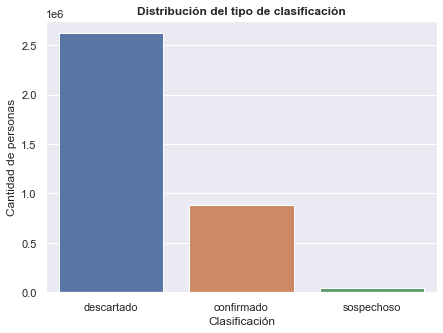

In [21]:
plt.figure(figsize = (7,5))
sns.set_theme(style="darkgrid", context = 'notebook')
sns.countplot(x = 'clasificacion', data = working_data)
plt.title('Distribución del tipo de clasificación',fontweight = 'bold')
plt.xlabel('Clasificación')
plt.ylabel('Cantidad de personas')
#Guardo el plot
plt.savefig('plots/Distribución del tipo de clasificación.jpg', dpi = 300, format = 'jpg')
plt.show()

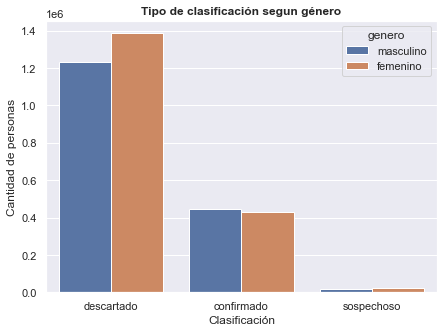

In [22]:
plt.figure(figsize = (7,5))
sns.countplot(x = 'clasificacion',
              hue = 'genero',
              data = working_data)
plt.title('Tipo de clasificación segun género', fontweight = 'bold' )
plt.xlabel('Clasificación')
plt.ylabel('Cantidad de personas')

plt.savefig('plots/clasificacion_segun_genero.jpg', dpi = 300, format = 'jpg')
plt.show()

__Ahora trabajemos solo con los positivos...__

In [23]:
#Distribucion del tipo de contagio
positivos['tipo_contagio'].value_counts()

Comunitario               398211
Contacto                   60097
En Investigación           38505
Trabajador de la Salud     15338
Importado                    367
Name: tipo_contagio, dtype: int64

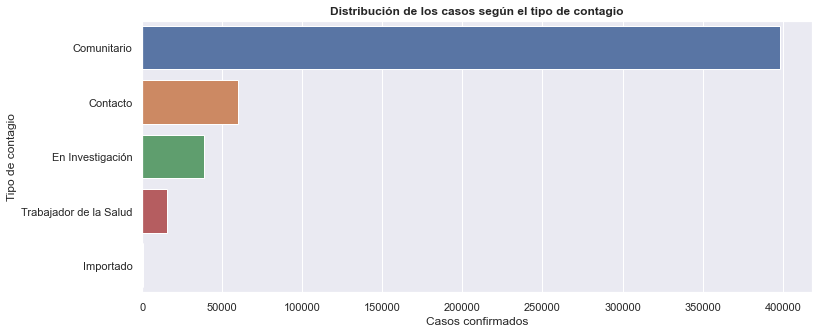

In [24]:
plt.figure(figsize = (12,5))
sns.set_theme(style="darkgrid")
sns.countplot(y = 'tipo_contagio',
              data = positivos,
              order = ['Comunitario', 'Contacto', 'En Investigación', 'Trabajador de la Salud', 'Importado'])
plt.title('Distribución de los casos según el tipo de contagio', fontweight = 'bold')
plt.xlabel('Casos confirmados')
#"plt.set_xticklabels ('100k', '200k', '300k', '400k, 500k', '600k', '700k')
plt.ylabel('Tipo de contagio')
plt.savefig('plots/distribucion_segun_contagio.jpg', dpi = 300, format = 'jpg')
plt.show()

__¿Hay diferencias según el género entre los casos positivos?__

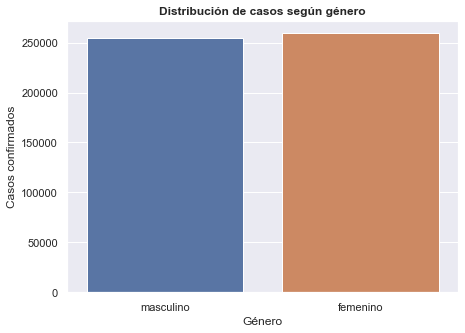

In [25]:
plt.figure(figsize = (7,5))
sns.set_theme(style="darkgrid")
sns.countplot(x = 'genero', data = positivos)
plt.title('Distribución de casos según género',fontweight = 'bold')
plt.xlabel('Género')
plt.ylabel('Casos confirmados')
plt.savefig('plots/distribucion_casos_genero.jpg', dpi = 300, format = 'jpg')
plt.show()

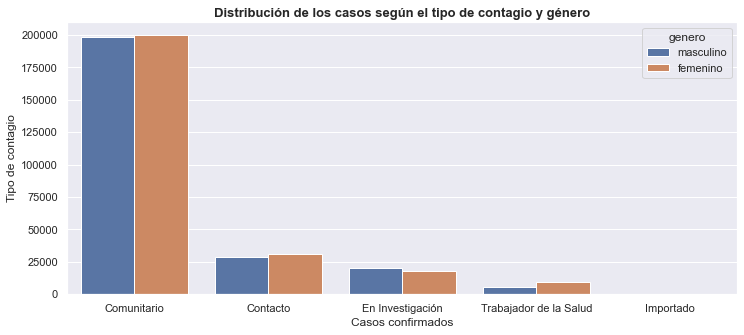

In [26]:
plt.figure(figsize = (12,5))
sns.set_theme(style="darkgrid")
sns.countplot(x = 'tipo_contagio',
              hue = 'genero',
              data = positivos,
              order = ['Comunitario', 'Contacto', 'En Investigación', 'Trabajador de la Salud', 'Importado'])
plt.title('Distribución de los casos según el tipo de contagio y género', fontweight = 'bold', fontsize = 13)
plt.xlabel('Casos confirmados')
plt.ylabel('Tipo de contagio')
plt.savefig('plots/distribucion_casos_contagioygenero.jpg', dpi = 300, format = 'jpg')
plt.show()

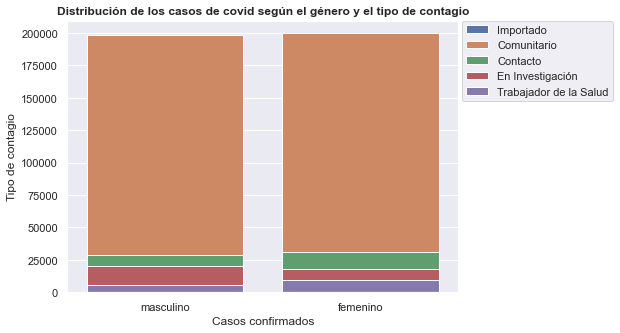

In [27]:
plt.figure(figsize = (7,5))
sns.set_theme(style="darkgrid")
sns.countplot(x = 'genero',
              hue = 'tipo_contagio',
              data = positivos,
              dodge = False)
plt.title('Distribución de los casos de covid según el género y el tipo de contagio', fontweight = 'bold')
plt.xlabel('Casos confirmados')
plt.ylabel('Tipo de contagio')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.rcParams["figure.figsize"] = (7, 5)
plt.savefig('plots/distribucion_casos_generoycontagio.jpg', dpi = 300, format = 'jpg')
plt.show()

__¿Cuántos fallecidos hubo hasta la actualidad?__

In [28]:
working_data['fallecido'].value_counts()

si    18771
Name: fallecido, dtype: int64

__Cómo se distribuye la edad entre los positivos y fallecidos?__

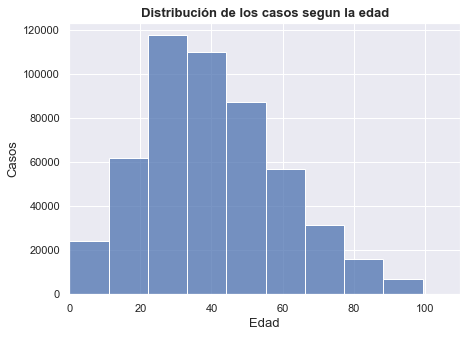

In [29]:
sns.histplot(x = 'edad', data = positivos, bins = 20)
plt.ylabel ('Casos', fontsize = 13)
plt.xlabel('Edad', fontsize = 13)
plt.xlim(0,110)
plt.rcParams["figure.figsize"] = (7, 5)
plt.title ('Distribución de los casos segun la edad',
           fontweight = 'bold',
           fontsize = 13)
plt.savefig('plots/edad_en_positivos.jpg', dpi = 300, format = 'jpg')
plt.show()

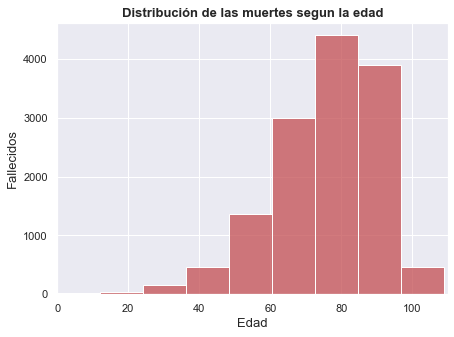

In [30]:
sns.histplot(x = 'edad', data = fallecidos, bins = 10, color = 'r')
plt.ylabel ('Fallecidos', fontsize = 13)
plt.xlabel('Edad', fontsize = 13)
plt.xlim(0,110)
plt.rcParams["figure.figsize"] = (7, 5)
plt.title('Distribución de las muertes segun la edad',
          fontweight = 'bold',
          fontsize = 13)
plt.savefig('plots/edad_en_fallecidos.jpg', dpi = 300, format = 'jpg')
plt.show()

__Ahora realizamos un boxplot con la distribución de la edad de los casos positivos y de las muertes__

Los 'boxplots' describen varias características relevantes al mismo tiempo.

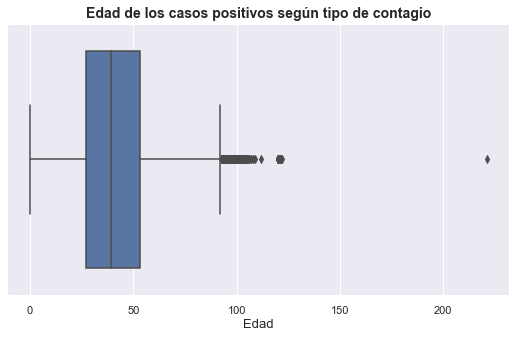

In [31]:
plt.figure(figsize = (9,5))
sns.set_theme(style="darkgrid")
sns.boxplot(x = 'edad', 
            data = positivos)
plt.title('Edad de los casos positivos según tipo de contagio',
          fontweight = 'bold',
          fontsize = 14)
plt.xlabel('Edad', fontsize = 13)

plt.show()

Unos de los datos que nos aporta el boxplot son los valores atípicos. En este caso vemos un valor atípico muy extraño que sabemos que no es posible: **una persona mayor a 200 años**

Podemos eliminar este valor atípico y ver como nos quedaría el boxplot.

Como luego trabajaremos con el DF positivos pero no indageremos en el tipo de contagio, creamos un nuevo DF llamado 'positivos_sin_atipico' con una copia de 'positivos' sin el valor atípico para los boxplots que realizaremos. Para lo siguiente (indagar sobre casos diarios), seguiremos con el df 'positivos'.

In [32]:
positivos_sin_atipico = positivos.query('edad < 150').copy()

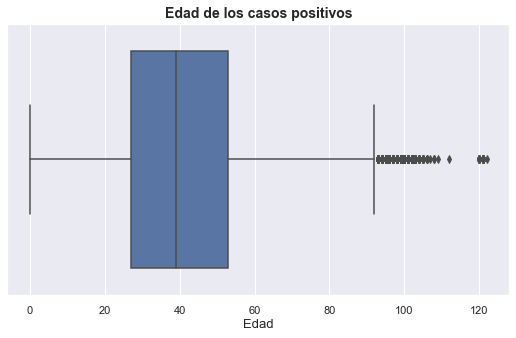

In [33]:
plt.figure(figsize = (9,5))
sns.set_theme(style="darkgrid")
sns.boxplot(x = 'edad', 
            data = positivos_sin_atipico)
plt.title('Edad de los casos positivos',
          fontweight = 'bold',
          fontsize = 14)
plt.xlabel('Edad', fontsize = 13)

plt.show()

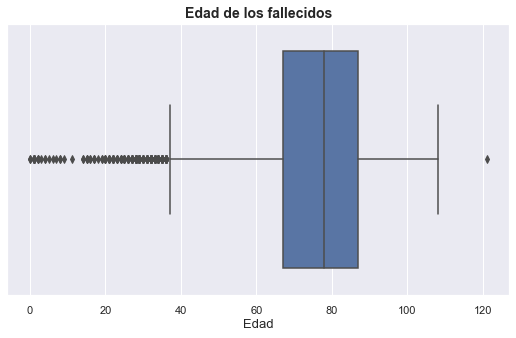

In [34]:
plt.figure(figsize = (9,5))
sns.set_theme(style="darkgrid")
sns.boxplot(x = 'edad', 
            data = fallecidos)
plt.title('Edad de los fallecidos',
          fontweight = 'bold',
          fontsize = 14)
plt.xlabel('Edad', fontsize = 13)

plt.show()

__Ahora realizamos un boxplot con la distribución de la edad de los casos positivos y de las muertes segun tipo de contagio__

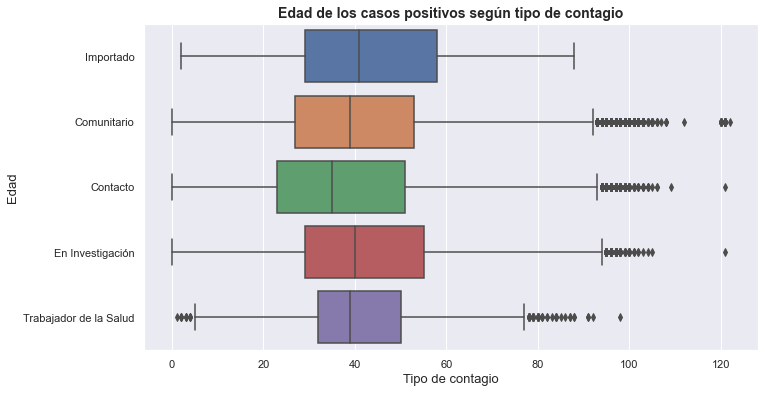

In [35]:
plt.figure(figsize = (11,6))
sns.set_theme(style="darkgrid")
sns.boxplot(x = 'edad',
            y = 'tipo_contagio',
            data = positivos_sin_atipico,
            dodge = False)
plt.title('Edad de los casos positivos según tipo de contagio',
          fontweight = 'bold',
          fontsize = 14)
plt.xlabel('Tipo de contagio', fontsize = 13)
plt.ylabel('Edad', fontsize = 13)
plt.show()

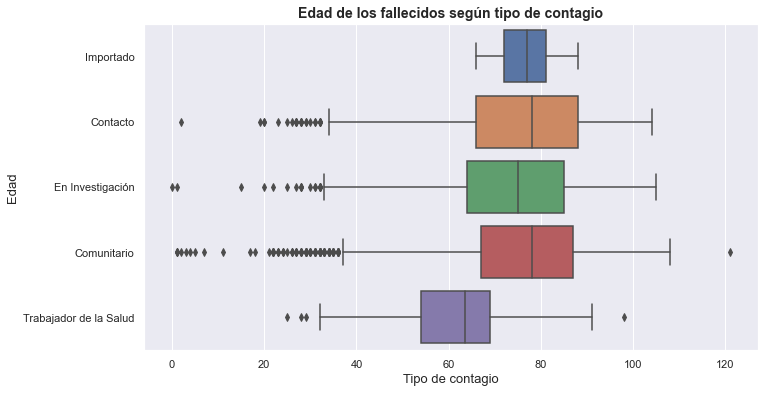

In [36]:
plt.figure(figsize = (11,6))
sns.set_theme(style="darkgrid")
sns.boxplot(x = 'edad',
            y = 'tipo_contagio',
            data = fallecidos,
            dodge = False)
plt.title('Edad de los fallecidos según tipo de contagio', fontweight = 'bold', fontsize = 14)
plt.xlabel('Tipo de contagio', fontsize = 13)
plt.ylabel('Edad', fontsize = 13)
plt.show()

### Ahora veamos solo los casos diarios

Creamos una nueva columna con que tenga el promedio de casos de los ultimos 7 días. Luego convertimos los date index en columnas y le cambiamos el nombre a 'fecha_clasificacion'

In [37]:
casos_diarios['7day_rolling_avg'] = casos_diarios.Casos.rolling(7).mean()
casos_diarios.reset_index(inplace=True)
casos_diarios = casos_diarios.rename(columns = {'index' :'fecha_clasificacion'})
casos_diarios

,fecha_clasificacion,Casos,7day_rolling_avg
0,2020-03-06,3,NaN
1,2020-03-07,1,NaN
2,2020-03-09,1,NaN
3,2020-03-10,1,NaN
4,2020-03-11,2,NaN
...,...,...,...
621,2021-11-19,246,225.285714
622,2021-11-20,198,225.714286
623,2021-11-21,185,229.714286
624,2021-11-22,178,218.428571


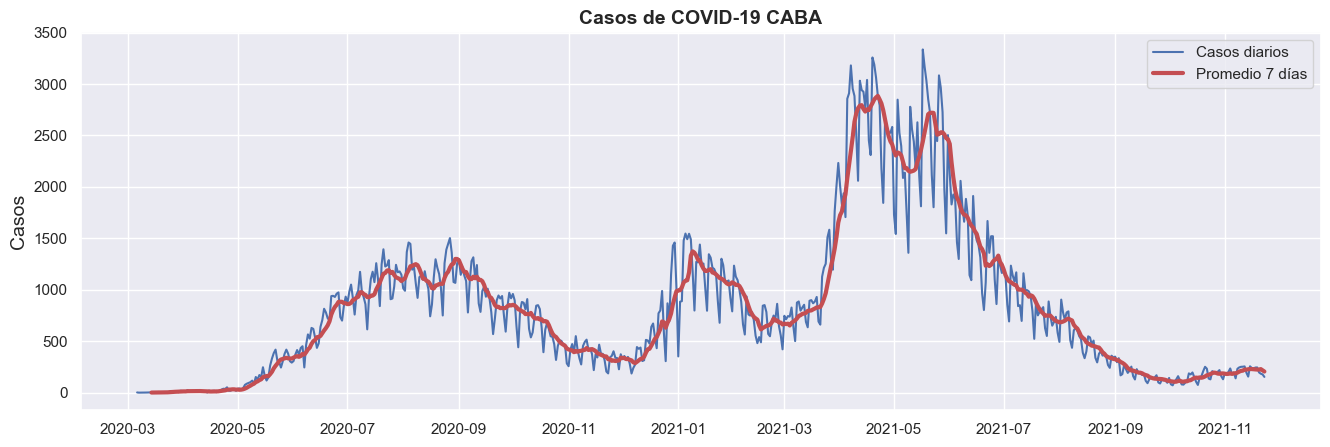

In [38]:
sns.set_theme(style="darkgrid", context = 'notebook')
plt.figure(figsize = (16,5), dpi = 100)
sns.lineplot(x = 'fecha_clasificacion',
             y = 'Casos',
             data = casos_diarios,
             label = 'Casos diarios',
             color = 'b',
             ci = None)
sns.lineplot(x = 'fecha_clasificacion',
             y = '7day_rolling_avg',
             data = casos_diarios,
             label = 'Promedio 7 días',
             linewidth = 3,
             color = 'r',
             ci = None)
plt.title('Casos de COVID-19 CABA',
          fontweight = 'bold',
          fontsize = 14)
plt.ylabel ('Casos', fontsize = 14)
plt.xlabel('')
plt.savefig('plots/casosdiarios_doblelineplot.jpg', dpi = 300, format = 'jpg')
plt.show()

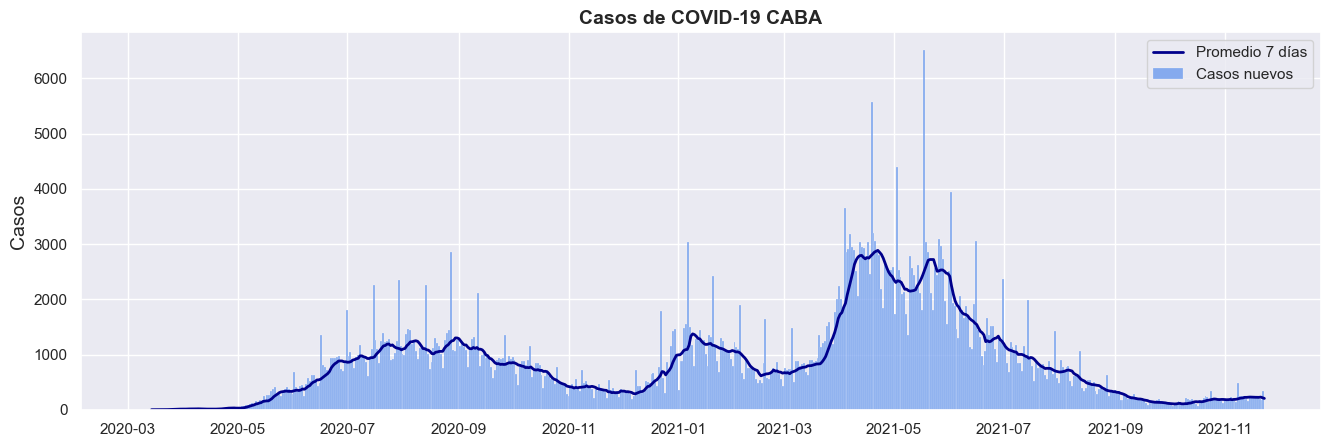

In [39]:
plt.figure(figsize = (16,5), dpi = 100)
sns.histplot(x = 'fecha_clasificacion',
             data = positivos, 
             bins = 584,
             label = 'Casos nuevos', 
             color = 'cornflowerblue')#588 porque len() de working data

sns.lineplot(x = 'fecha_clasificacion',
             y = '7day_rolling_avg',
             data = casos_diarios,
             label = 'Promedio 7 días',
             color = 'darkblue',
             linewidth = 2,
             ci = None)

plt.title('Casos de COVID-19 CABA',
          fontweight = 'bold',
          fontsize = 14)
plt.ylabel ('Casos', fontsize = 14)
plt.xlabel('')
plt.savefig('plots/casosdiarios_lineyhistplot.jpg', dpi = 300, format = 'jpg')
plt.show()

#### Hacemos lo mismo con FALLECIDOS DIARIOS

In [40]:
muertes_diarias['7_dias_promedio'] = muertes_diarias.Muertes.rolling(7).mean()
muertes_diarias.reset_index(inplace=True)
muertes_diarias = muertes_diarias.rename(columns = {'index' :'fecha_fallecimiento'})
muertes_diarias

,fecha_fallecimiento,Muertes,7_dias_promedio
0,2020-03-07,1,NaN
1,2020-03-09,1,NaN
2,2020-03-10,1,NaN
3,2020-03-15,1,NaN
4,2020-03-17,1,NaN
...,...,...,...
606,2021-11-18,2,2.142857
607,2021-11-19,4,2.571429
608,2021-11-20,2,2.714286
609,2021-11-21,1,2.428571


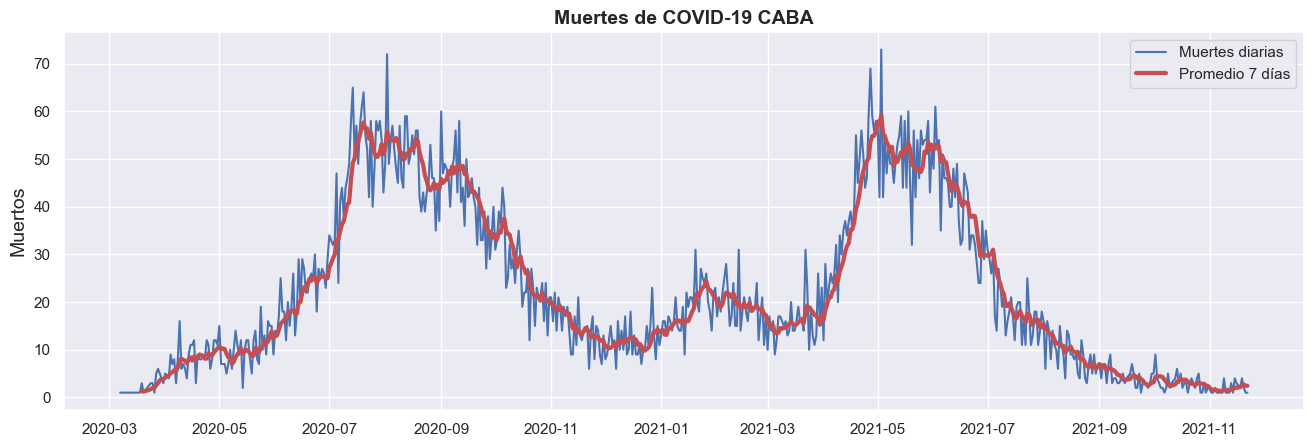

In [41]:
plt.figure(figsize = (16,5), dpi = 100)
sns.lineplot(x = 'fecha_fallecimiento',
             y = 'Muertes',
             data = muertes_diarias,
             label = 'Muertes diarias',
             color = 'b',
             ci = None)

sns.lineplot(x = 'fecha_fallecimiento',
             y = '7_dias_promedio',
             data = muertes_diarias,
             label = 'Promedio 7 días',
             linewidth = 3,
             color = 'r',
             ci = None)
plt.title('Muertes de COVID-19 CABA',
          fontweight = 'bold',
         fontsize = 14)
plt.ylabel ('Muertos', fontsize = 14)
plt.xlabel('')
plt.savefig('plots/muertesdiarias_doblelineplot.jpg', dpi = 300, format = 'jpg')
plt.show()

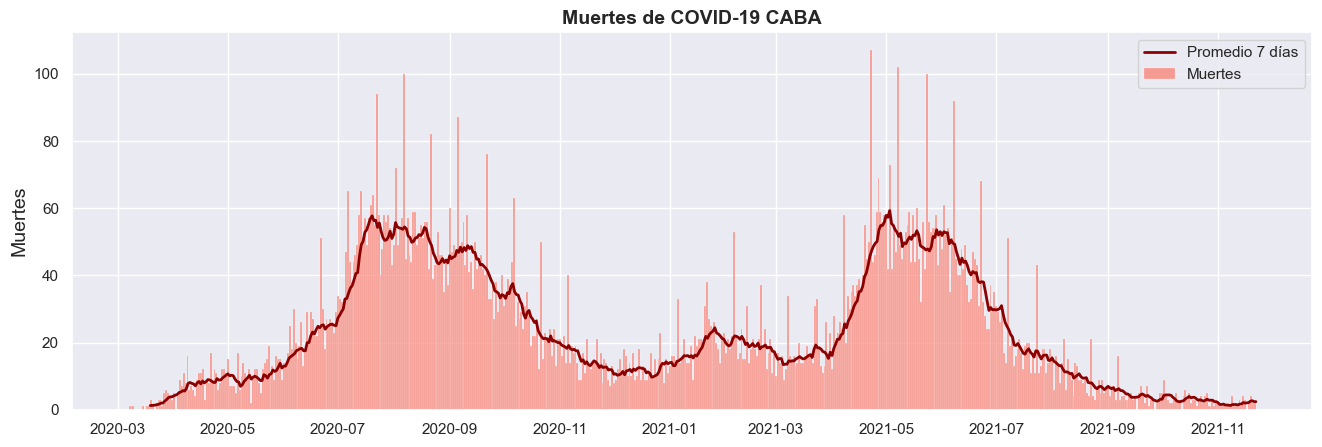

In [42]:
plt.figure(figsize = (16,5), dpi = 100)
sns.histplot(x = 'fecha_fallecimiento',
             data = fallecidos, bins = 584,
             label = 'Muertes',
             color = 'salmon') #588 porque len() de working data
sns.lineplot(x = 'fecha_fallecimiento',
             y = '7_dias_promedio',
             data = muertes_diarias,
             label = 'Promedio 7 días',
             color = 'darkred',
             linewidth = 2, ci = None )
plt.title('Muertes de COVID-19 CABA',
          fontweight = 'bold',
         fontsize = 14)
plt.ylabel ('Muertes', fontsize = 14)
plt.xlabel('')

plt.savefig('plots/muertesdiarias_lineyhistplot.jpg', dpi = 300, format = 'jpg')
plt.show()

In [43]:
muertes_diarias

,fecha_fallecimiento,Muertes,7_dias_promedio
0,2020-03-07,1,NaN
1,2020-03-09,1,NaN
2,2020-03-10,1,NaN
3,2020-03-15,1,NaN
4,2020-03-17,1,NaN
...,...,...,...
606,2021-11-18,2,2.142857
607,2021-11-19,4,2.571429
608,2021-11-20,2,2.714286
609,2021-11-21,1,2.428571


__Ahora unimos CASOS DIARIOS y MUERTES DIARIAS en un mismo gráfico__

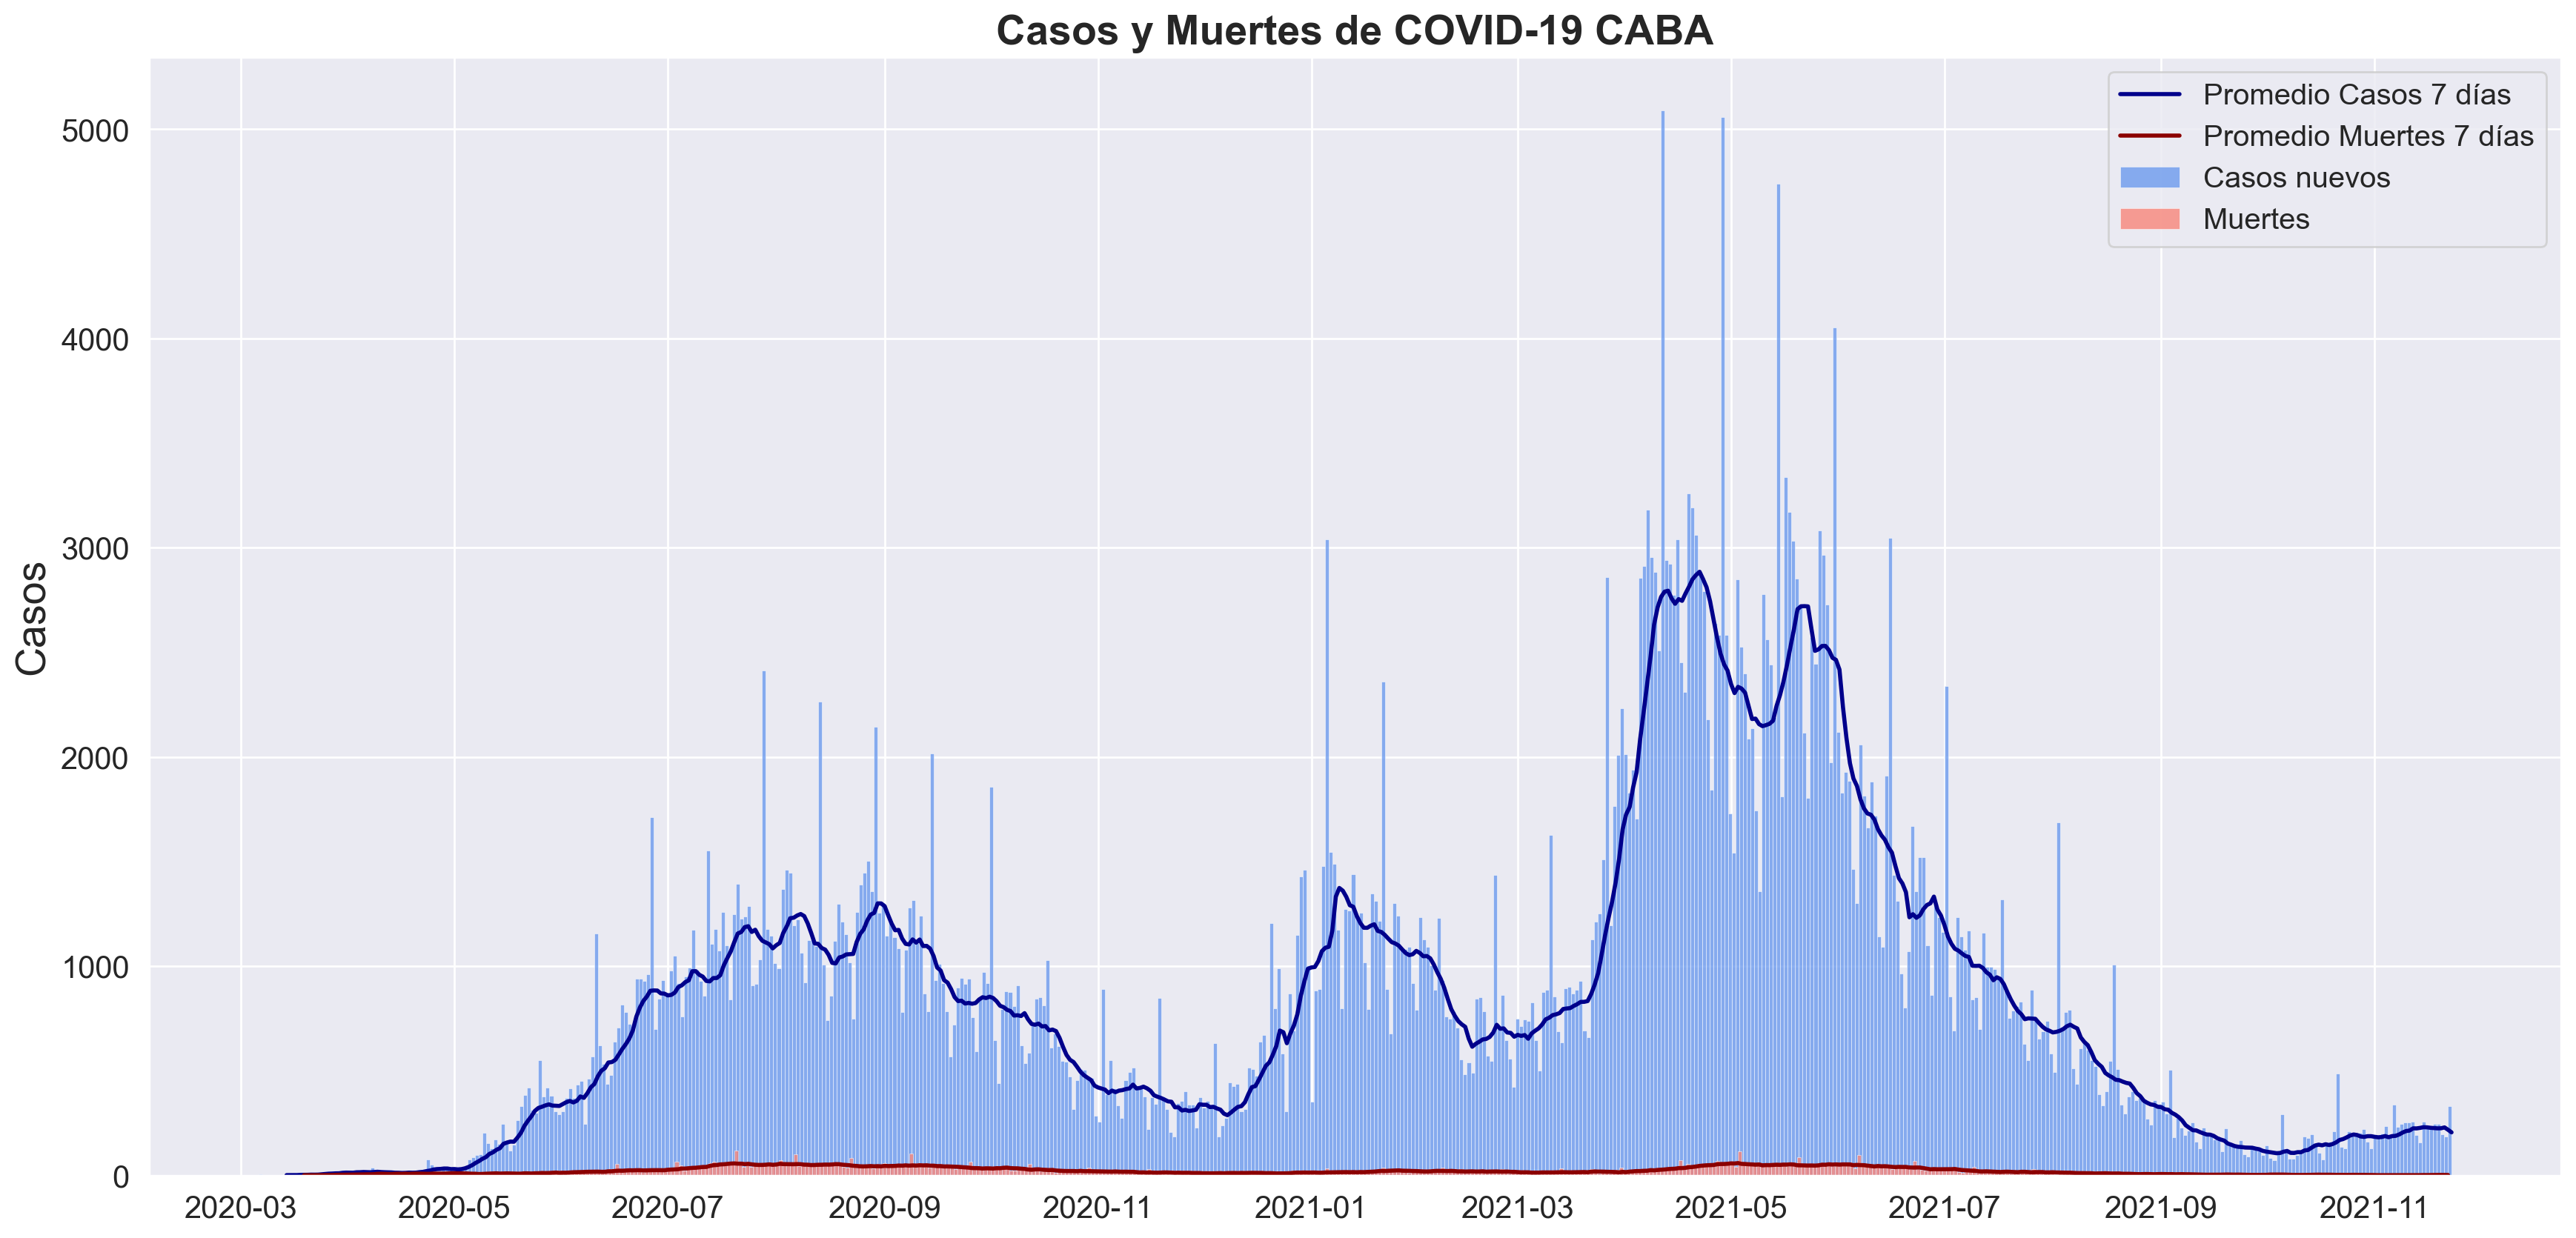

In [44]:
#Plot casos diarios
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.figure(figsize = (21,10), dpi = 200)
sns.histplot(x = 'fecha_clasificacion',
             data = positivos,
             bins = 588,
             label = 'Casos nuevos',
             color = 'cornflowerblue') #588 porque len() de working data

#PLot promedio de casos 7 dias
sns.lineplot(x = 'fecha_clasificacion',
             y = '7day_rolling_avg',
             data = casos_diarios,
             label = 'Promedio Casos 7 días',
             color = 'darkblue',
             linewidth = 2,
             ci = None)

#Plot Muertes diarias
sns.histplot(x = 'fecha_fallecimiento',
             data = fallecidos,
             bins = 588,
             label = 'Muertes',
             color = 'salmon') #588 porque len() de working data

#Plot promedio de muertes 7 dias
sns.lineplot(x = 'fecha_fallecimiento',
             y = '7_dias_promedio',
             data = muertes_diarias,
             label = 'Promedio Muertes 7 días',
             color = 'darkred',
             linewidth = 2,
             ci = None )
plt.title('Casos y Muertes de COVID-19 CABA', fontweight = 'bold', fontsize = 20)
plt.ylabel ('Casos', fontsize = 20)
plt.xlabel('')
plt.legend(fontsize = 'large')
plt.savefig('plots/casosymuertesdiarias.jpg', dpi = 300, format = 'jpg')
plt.show()